Precisión del modelo: 1.00
Matriz de Confusión:
[[59379     0]
 [    0  3981]]
Informe de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59379
           1       1.00      1.00      1.00      3981

    accuracy                           1.00     63360
   macro avg       1.00      1.00      1.00     63360
weighted avg       1.00      1.00      1.00     63360



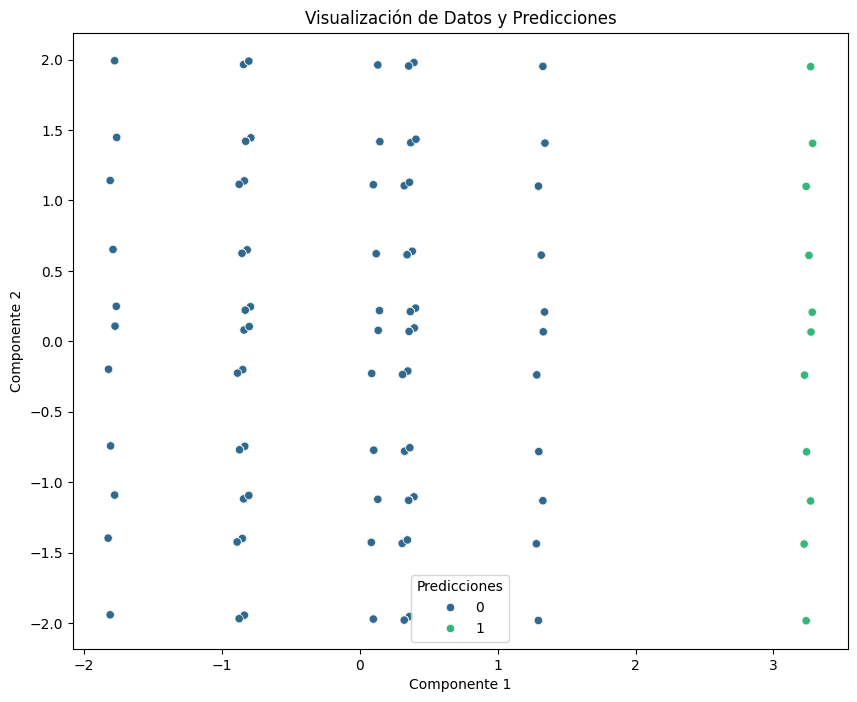

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Leer el dataset desde el archivo CSV
df = pd.read_csv('Cleaned-Data.csv')

# Seleccionar las columnas a utilizar
features = df[['Dry-Cough', 'Difficulty-in-Breathing', 'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion', 'Runny-Nose', 'Diarrhea']]
target = df['None_Sympton']  # Seleccionar la columna a predecir

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el clasificador KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Numero de vecinos

# Entrenar el clasificador
knn.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = knn.predict(X_test_scaled)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Imprimir resultados
print(f'Precisión del modelo: {accuracy:.2f}')
print('Matriz de Confusión:')
print(conf_matrix)
print('Informe de Clasificación:')
print(class_report)

# Reducir la dimensionalidad con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test_scaled)

# Crear un DataFrame para visualización
df_pca = pd.DataFrame(data=X_pca, columns=['Componente 1', 'Componente 2'])
df_pca['Predicciones'] = y_pred

# Visualizar los datos y las predicciones en un diagrama de dispersión
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Componente 1', y='Componente 2', hue='Predicciones', data=df_pca, palette='viridis')
plt.title('Visualización de Datos y Predicciones')
plt.show()
